In [1]:
import pandas as pd
import numpy as np
import csv as csv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cross_validation import train_test_split
import time
import time
from datetime import date
import datetime

%matplotlib inline

#### Concatenate the two training DataFrames

In [2]:
train_df1 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset.csv', header=0)  
train_df2 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset_complement.csv', header=0)  
train_df = pd.concat([train_df1,train_df2])
train_df.shape

(486048, 54)

#### Dropping few columns

In [3]:
train_df = train_df.drop(['user_id','mail_id','mail_type','clicked','hacker_timezone',
                          'mail_category','sent_time','unsubscribed',
                          'open_time','click_time','unsubscribe_time','hacker_created_at'], axis=1) 
train_df.head()

,last_online,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1.459520e+09,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,1.461210e+09,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,1.463411e+09,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,1.462768e+09,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,1.461248e+09,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Converting Boolean to Int

In [4]:
train_df['opened'] = train_df.opened.map({True:1,False:0}).astype(int)
train_df['hacker_confirmation'] = train_df.hacker_confirmation.map({True:1,False:0}).astype(int)
train_df.shape


(486048, 42)

#### Dropping rows with NA or Null Values (last_online is the only attribute with NA or Null values)

In [5]:
train_df = train_df.dropna(subset=['last_online'],axis=0)
train_df.shape

(485471, 42)

#### Sorting Columns to data constancy

In [6]:
train_df = train_df.reindex_axis(sorted(train_df.columns), axis=1)
train_df.shape

(485471, 42)

#### Adding opened attribute to the first column of DataFrame

In [7]:
train_df = train_df.reindex_axis(['opened'] + list([col for col in train_df.columns if col != 'opened']), axis=1)
train_df.head()

,opened,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,0,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,0,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,0,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,0,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Check for NA values

In [8]:
hasany = False
for cl in train_df.columns.values:
    hasNa = train_df[cl].isnull().sum() > 0
    if hasNa:
        hasany = True
        print cl,train_df[cl].isnull().sum()
if not hasany:
    print 'No NA found'
    

No NA found


#### Check data types for your model

In [9]:
for cl in train_df.columns.values:
    print cl,train_df[cl].dtype

opened int32
contest_login_count int64
contest_login_count_1_days int64
contest_login_count_30_days int64
contest_login_count_365_days int64
contest_login_count_7_days int64
contest_participation_count int64
contest_participation_count_1_days int64
contest_participation_count_30_days int64
contest_participation_count_365_days int64
contest_participation_count_7_days int64
forum_comments_count int64
forum_count int64
forum_expert_count int64
forum_questions_count int64
hacker_confirmation int32
ipn_count int64
ipn_count_1_days int64
ipn_count_30_days int64
ipn_count_365_days int64
ipn_count_7_days int64
ipn_read int64
ipn_read_1_days int64
ipn_read_30_days int64
ipn_read_365_days int64
ipn_read_7_days int64
last_online float64
submissions_count int64
submissions_count_1_days int64
submissions_count_30_days int64
submissions_count_365_days int64
submissions_count_7_days int64
submissions_count_contest int64
submissions_count_contest_1_days int64
submissions_count_contest_30_days int64
su

In [45]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import ensemble 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

train_data = train_df.values
x_train_all = train_data[0::,1::]
y_train_all = train_data[0::,0]

x_train, x_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], 
                            test_size = 0.2, random_state = 123) # Split training/test.


Using Variance with Threshold -> VarianceThreshold
------

In [21]:
selectionAttributes = VarianceThreshold()
model = selectionAttributes.fit(x_train)

print model.variances_ 

x_train_selected = model.transform(x_train)
x_test_selected = model.transform(x_test)
print x_train_selected.shape

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


[  5.92169497e+01   1.15235800e-02   8.17802660e-01   3.18695098e+01
   1.96381864e-01   1.52219968e+02   2.69246393e-02   2.17488492e+00
   8.65012424e+01   4.52408418e-01   8.25390492e+00   1.23537944e+01
   6.35134354e-02   1.84476335e-01   7.62243473e-02   8.78124989e+02
   4.11418971e-01   7.17472235e+01   8.28937683e+02   8.23140625e+00
   5.02016422e+01   1.75134449e-02   3.03373213e+00   4.46147079e+01
   3.95243702e-01   1.08753180e+13   1.47458630e+04   2.45907948e+00
   5.44221499e+02   8.05620176e+03   7.78755482e+01   6.09337880e+03
   4.87003753e-01   6.19974722e+01   2.37681954e+03   1.03736998e+01
   4.60234296e+03   1.87207125e+00   4.18513016e+02   3.39549336e+03
   6.19790667e+01]
(388376L, 41L)
             precision    recall  f1-score   support

        0.0       0.79      0.83      0.81     64915
        1.0       0.62      0.55      0.58     32180

avg / total       0.73      0.74      0.73     97095



Univariate feature selection
----------

Univariate feature selection works by selecting the best features based on univariate statistical tests. <br/> It can be seen as a preprocessing step to an estimator. 
http://stats.stackexchange.com/questions/80002/categorize-statistical-tests-into-univariate-and-multivariate-methods

<blockquote>
<div><ul class="simple">
<li>For regression: <a class="reference internal" href="generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression" title="sklearn.feature_selection.f_regression"><code class="xref py py-func docutils literal"><span class="pre">f_regression</span></code></a></li>
<li>For classification: <a class="reference internal" href="generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2" title="sklearn.feature_selection.chi2"><code class="xref py py-func docutils literal"><span class="pre">chi2</span></code></a> or <a class="reference internal" href="generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif" title="sklearn.feature_selection.f_classif"><code class="xref py py-func docutils literal"><span class="pre">f_classif</span></code></a></li>
</ul>
</div></blockquote>

GenericUnivariateSelect
----------

#### Univariate feature selector with configurable strategy.

#### GENERAL WAY TO WORK WITH FEATURE SELECTION


In [39]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2,f_classif

model = GenericUnivariateSelect(chi2, 'k_best',40).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[  2.48813908e+02   7.87559378e+01   1.44857603e+03   7.04695292e+01
   8.43626811e+02   9.46497187e+02   1.34077011e+02   1.05899770e+03
   5.73707629e+02   7.96595558e+02   1.90112017e+02   4.07692114e+02
   2.57257414e+01   8.79517977e+01   1.86700852e+02   3.51098457e+03
   3.66416782e+02   6.54319661e+03   3.45027584e+03   2.59248873e+03
   3.55310722e+03   3.54623288e+02   4.23154521e+03   3.74444521e+03
   1.87956167e+03   5.65882615e+06   2.84894703e+03   5.24720421e+03
   6.05739875e+04   2.95700180e+03   3.23039997e+04   1.63879825e+03
   1.42097800e+03   8.98072725e+03   7.06184020e+02   3.46894686e+03
   1.39594723e+03   3.83441289e+03   5.15939866e+04   2.25674138e+03
   2.90630196e+04]
Pvalues
[  4.70999932e-056   7.02771840e-019   0.00000000e+000   4.67430860e-017
   1.76651431e-185   7.65896532e-208   5.25568103e-031   2.69559007e-232
   8.76621651e-127   2.96653921e-175   3.00524783e-043   1.16546016e-090
   3.93542719e-007   6.70691312e-021   1.66915331e-042   

RFE - Recursive feature elimination
----
Feature ranking with recursive feature elimination.<br/>
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. <br/>First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. <br/>That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [44]:
from sklearn.feature_selection import RFE

hipotese = tree.DecisionTreeClassifier(random_state=1234)

rfe = RFE(estimator=hipotese, n_features_to_select=1, step=1)

model = rfe.fit(x_train, y_train)

print "Support - Mask"
print model.support_  
print "Ranking"
print model.ranking_  

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
# hipotese = tree.DecisionTreeClassifier(random_state=1234)
 
hipotese = model.estimator_

# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Support - Mask
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False]
Ranking
[17 41 27 20 33 16 36 21  8 25 31 26 38 37 30  7 24  5  3 11 12 39 23 18 32
  1  6 28  9  2 14 13 40 29 19 35  4 34 15 10 22]
(388376L, 1L)
             precision    recall  f1-score   support

        0.0       0.74      0.87      0.80     64915
        1.0       0.60      0.39      0.47     32180

avg / total       0.70      0.71      0.69     97095



RFECV - Recursive feature elimination with cross-validation
------
A recursive feature elimination example with automatic tuning of the number of features selected with cross-validation.


Optimal number of features : 1


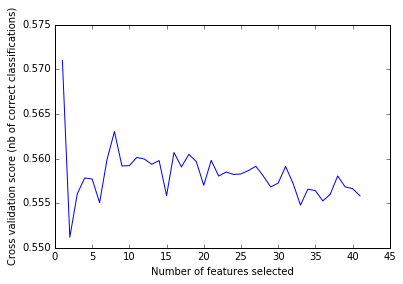

In [48]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold



hipotese = tree.DecisionTreeClassifier(random_state=1234)

rfecv = RFECV(estimator=hipotese, step=1, cv=StratifiedKFold(y_train_all, 3),
              scoring='accuracy')
rfecv.fit(x_train_all, y_train_all)



print("Optimal number of features : %d" % rfecv.n_features_)



# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature selection using SelectFromModel
------

`SelectFromModel` is a meta-transformer that can be used along with any estimator that has a `coef_` or `feature_importances_` attribute after fitting. <br/>
The features are considered unimportant and removed, if the corresponding `coef_` or `feature_importances_` values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are build-in heuristics for finding a threshold using a string argument.

##### Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.


In [50]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

model = SelectFromModel(lsvc, prefit=False)
model = model.fit(x_train, y_train)

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
# hipotese = tree.DecisionTreeClassifier(random_state=1234)
 
hipotese = model.estimator_

# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


(388376L, 39L)
             precision    recall  f1-score   support

        0.0       0.67      0.99      0.80     64915
        1.0       0.47      0.02      0.03     32180

avg / total       0.60      0.67      0.55     97095



# Feature selection using SelectFromModel and LinearSVC 
## Changing threshold from SelectFromModel object
#### ps: working to reduce dimensionalities

Initial number of features:
23
Training data shape:
(388376L, 2L)
Support Indexed = True from feature selection:
[ 2 14]
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80     64915
        1.0       0.14      0.00      0.00     32180

avg / total       0.49      0.67      0.54     97095



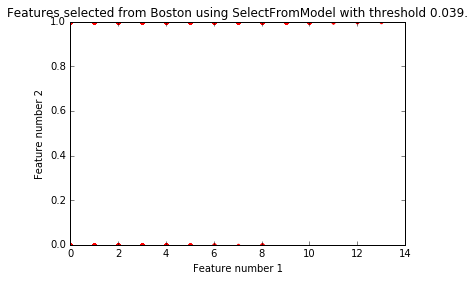

In [59]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

model = SelectFromModel(lsvc, prefit=False,threshold=0.0025)
model = model.fit(x_train, y_train)

x_train_selected =  model.transform(x_train)

n_features = x_train_selected.shape[1] 
print "Initial number of features:"
print n_features

while n_features > 2:
    model.threshold += 0.0001
    x_train_selected = model.transform(x_train)
    n_features = x_train_selected.shape[1]

print "Training data shape:"
print x_train_selected.shape

print "Support Indexed = True from feature selection:"
print model.get_support(True)

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
 
# hipotese = model.estimator_

# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()


hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % model.threshold)
feature1 = x_train_selected[:, 0]
feature2 = x_train_selected[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


Appendix - 1
---------

SelectKBest
-----

chi2
------
#### Compute chi-squared stats between each non-negative feature and class.
#### This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.
##### Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

model = SelectKBest(chi2, k=2).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[  2.48813908e+02   7.87559378e+01   1.44857603e+03   7.04695292e+01
   8.43626811e+02   9.46497187e+02   1.34077011e+02   1.05899770e+03
   5.73707629e+02   7.96595558e+02   1.90112017e+02   4.07692114e+02
   2.57257414e+01   8.79517977e+01   1.86700852e+02   3.51098457e+03
   3.66416782e+02   6.54319661e+03   3.45027584e+03   2.59248873e+03
   3.55310722e+03   3.54623288e+02   4.23154521e+03   3.74444521e+03
   1.87956167e+03   5.65882615e+06   2.84894703e+03   5.24720421e+03
   6.05739875e+04   2.95700180e+03   3.23039997e+04   1.63879825e+03
   1.42097800e+03   8.98072725e+03   7.06184020e+02   3.46894686e+03
   1.39594723e+03   3.83441289e+03   5.15939866e+04   2.25674138e+03
   2.90630196e+04]
Pvalues
[  4.70999932e-056   7.02771840e-019   0.00000000e+000   4.67430860e-017
   1.76651431e-185   7.65896532e-208   5.25568103e-031   2.69559007e-232
   8.76621651e-127   2.96653921e-175   3.00524783e-043   1.16546016e-090
   3.93542719e-007   6.70691312e-021   1.66915331e-042   

f_classif
------
#### Compute the ANOVA F-value for the provided sample.


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

model = SelectKBest(f_classif, k=2).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[   15.56719078    66.28201378   933.98776104     6.39787658   699.13901104
    36.33378924    86.86163536   436.64180941    31.11640653   487.73946853
     8.72054615    17.72135466     9.28109587    31.98597646  2258.77950748
    97.28037691   216.66952462   472.75284483    99.86430699   508.38300944
   183.20088034   283.82929815   617.96746467   202.44402531   570.88755858
   760.73900966    11.16031246   432.06786839  1188.1422688     17.84529666
  1234.56494106     4.60066622   139.3669068    232.50012686     4.0076796
   162.4083098     12.33216028   316.73754995  1117.41878851    23.34832107
  1167.00793315]
Pvalues
[  7.96383282e-005   3.91948422e-016   7.03785512e-205   1.14260863e-002
   6.30675395e-154   1.66405351e-009   1.16964844e-020   6.58912469e-097
   2.43169834e-008   5.15704926e-108   3.14662606e-003   2.55796921e-005
   2.31546397e-003   1.55398194e-008   0.00000000e+000   6.05488956e-023
   4.96718066e-049   9.32023104e-105   1.64276063e-023   1.68461416e-

SelectPercentile
-----
##### Select features according to a percentile of the highest scores.


In [26]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif

model = SelectPercentile(f_classif, percentile=90).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[   15.56719078    66.28201378   933.98776104     6.39787658   699.13901104
    36.33378924    86.86163536   436.64180941    31.11640653   487.73946853
     8.72054615    17.72135466     9.28109587    31.98597646  2258.77950748
    97.28037691   216.66952462   472.75284483    99.86430699   508.38300944
   183.20088034   283.82929815   617.96746467   202.44402531   570.88755858
   760.73900966    11.16031246   432.06786839  1188.1422688     17.84529666
  1234.56494106     4.60066622   139.3669068    232.50012686     4.0076796
   162.4083098     12.33216028   316.73754995  1117.41878851    23.34832107
  1167.00793315]
Pvalues
[  7.96383282e-005   3.91948422e-016   7.03785512e-205   1.14260863e-002
   6.30675395e-154   1.66405351e-009   1.16964844e-020   6.58912469e-097
   2.43169834e-008   5.15704926e-108   3.14662606e-003   2.55796921e-005
   2.31546397e-003   1.55398194e-008   0.00000000e+000   6.05488956e-023
   4.96718066e-049   9.32023104e-105   1.64276063e-023   1.68461416e-

SelectFpr
-----

#### Filter: Select the pvalues below alpha based on a FPR test. <br/>
#### FPR test stands for False Positive Rate test. It controls the total amount of false detections.

In [31]:
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import chi2,f_classif

model = SelectFpr(chi2, alpha=0.001).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[  2.48813908e+02   7.87559378e+01   1.44857603e+03   7.04695292e+01
   8.43626811e+02   9.46497187e+02   1.34077011e+02   1.05899770e+03
   5.73707629e+02   7.96595558e+02   1.90112017e+02   4.07692114e+02
   2.57257414e+01   8.79517977e+01   1.86700852e+02   3.51098457e+03
   3.66416782e+02   6.54319661e+03   3.45027584e+03   2.59248873e+03
   3.55310722e+03   3.54623288e+02   4.23154521e+03   3.74444521e+03
   1.87956167e+03   5.65882615e+06   2.84894703e+03   5.24720421e+03
   6.05739875e+04   2.95700180e+03   3.23039997e+04   1.63879825e+03
   1.42097800e+03   8.98072725e+03   7.06184020e+02   3.46894686e+03
   1.39594723e+03   3.83441289e+03   5.15939866e+04   2.25674138e+03
   2.90630196e+04]
Pvalues
[  4.70999932e-056   7.02771840e-019   0.00000000e+000   4.67430860e-017
   1.76651431e-185   7.65896532e-208   5.25568103e-031   2.69559007e-232
   8.76621651e-127   2.96653921e-175   3.00524783e-043   1.16546016e-090
   3.93542719e-007   6.70691312e-021   1.66915331e-042   

SelectFwe
-------

#### Filter: Select the p-values corresponding to Family-wise error rate


In [33]:
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import chi2,f_classif

model = SelectFwe(chi2, alpha=0.001).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[  2.48813908e+02   7.87559378e+01   1.44857603e+03   7.04695292e+01
   8.43626811e+02   9.46497187e+02   1.34077011e+02   1.05899770e+03
   5.73707629e+02   7.96595558e+02   1.90112017e+02   4.07692114e+02
   2.57257414e+01   8.79517977e+01   1.86700852e+02   3.51098457e+03
   3.66416782e+02   6.54319661e+03   3.45027584e+03   2.59248873e+03
   3.55310722e+03   3.54623288e+02   4.23154521e+03   3.74444521e+03
   1.87956167e+03   5.65882615e+06   2.84894703e+03   5.24720421e+03
   6.05739875e+04   2.95700180e+03   3.23039997e+04   1.63879825e+03
   1.42097800e+03   8.98072725e+03   7.06184020e+02   3.46894686e+03
   1.39594723e+03   3.83441289e+03   5.15939866e+04   2.25674138e+03
   2.90630196e+04]
Pvalues
[  4.70999932e-056   7.02771840e-019   0.00000000e+000   4.67430860e-017
   1.76651431e-185   7.65896532e-208   5.25568103e-031   2.69559007e-232
   8.76621651e-127   2.96653921e-175   3.00524783e-043   1.16546016e-090
   3.93542719e-007   6.70691312e-021   1.66915331e-042   

SelectFdr
-------
### Filter: Select the p-values for an estimated false discovery rate <br/>
### This uses the Benjamini-Hochberg procedure. `alpha` is an upper bound on the expected false discovery rate.

In [34]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2,f_classif

model = SelectFdr(chi2, alpha=0.001).fit(x_train, y_train)

print "Scores"
print model.scores_ 
print "Pvalues"
print model.pvalues_ 

x_train_selected =  model.transform(x_train)

print x_train_selected.shape

x_test_selected =  model.transform(x_test)

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)
# hipotese = svm.SVC()

hipotese.fit(x_train_selected, y_train)
y_true, y_pred = y_test, hipotese.predict(x_test_selected) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


Scores
[  2.48813908e+02   7.87559378e+01   1.44857603e+03   7.04695292e+01
   8.43626811e+02   9.46497187e+02   1.34077011e+02   1.05899770e+03
   5.73707629e+02   7.96595558e+02   1.90112017e+02   4.07692114e+02
   2.57257414e+01   8.79517977e+01   1.86700852e+02   3.51098457e+03
   3.66416782e+02   6.54319661e+03   3.45027584e+03   2.59248873e+03
   3.55310722e+03   3.54623288e+02   4.23154521e+03   3.74444521e+03
   1.87956167e+03   5.65882615e+06   2.84894703e+03   5.24720421e+03
   6.05739875e+04   2.95700180e+03   3.23039997e+04   1.63879825e+03
   1.42097800e+03   8.98072725e+03   7.06184020e+02   3.46894686e+03
   1.39594723e+03   3.83441289e+03   5.15939866e+04   2.25674138e+03
   2.90630196e+04]
Pvalues
[  4.70999932e-056   7.02771840e-019   0.00000000e+000   4.67430860e-017
   1.76651431e-185   7.65896532e-208   5.25568103e-031   2.69559007e-232
   8.76621651e-127   2.96653921e-175   3.00524783e-043   1.16546016e-090
   3.93542719e-007   6.70691312e-021   1.66915331e-042   